<a href="https://colab.research.google.com/github/prachimethi/assignment/blob/main/Boosting_technique_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **THEORITICAl QUESTIONS**

Ques-1 What is Boosting in Machine Learning ?

Boosting is a powerful ensemble learning technique in machine learning used to improve the performance of weak learners by combining them to create a strong learner. A weak learner is a model that performs slightly better than random guessing, like a decision tree with limited depth. Boosting works by sequentially training weak models and adjusting the training process based on the errors made by previous models.

Ques-2 How does the bagging differ from boosting ?

Bagging (Bootstrap Aggregating) and Boosting are both ensemble learning techniques, but they differ significantly in how they approach combining multiple models to improve performance.

Bagging:

Parallel Training: Each model in bagging is trained independently, in parallel. There is no interaction or correction of errors between models.
Bootstrapping: Bagging uses a technique called bootstrapping, where multiple subsets of the training data are created by sampling with replacement. Each subset is used to train a separate model, and all models work independently.

Boosting:

Sequential Training: In boosting, models are trained sequentially, with each new model focusing on the errors made by the previous one. The models are not trained independently.
Error Correction: Boosting adjusts the weights of misclassified data points so that subsequent models focus more on the harder-to-predict instances.

Ques-3 What is the key idea behind AdaBoost ?

The key idea behind AdaBoost (Adaptive Boosting) is to combine multiple weak learners (typically simple models like shallow decision trees) to create a strong learner. It does this by focusing on the mistakes made by previous models and adjusting the training process to correct those errors, resulting in a model that performs much better than individual weak learners.

Ques-4 Explain the working of AdaBoost with an example ?

Sequential Learning: AdaBoost builds models one after the other, with each model focusing more on correcting the mistakes of the previous one.

Weight Adjustment: It increases the weight of misclassified data points, which forces the next learner to focus on those hard-to-predict examples.

Weighted Voting: The final prediction is based on the weighted votes of all the weak learners, where stronger learners (those with fewer mistakes) have more influence.

This iterative process allows AdaBoost to convert a series of weak learners into a strong classifier that performs much better than any single model.

Ques-5 What is Gradient Boosting, and how is it different from AdaBoost ?

Gradient Boosting: Minimizes a specific loss function by fitting new models to the residuals of previous models using gradient descent. It works well for both regression and classification and is widely used in modern machine learning models (e.g., XGBoost, LightGBM, and CatBoost).

AdaBoost: Focuses on misclassified examples and adjusts the weights of data points accordingly. It is simpler and often works well with simpler models (like decision stumps), but can struggle with noisy data.

While both methods sequentially improve upon a weak learner, Gradient Boosting is more flexible in terms of optimization (due to the use of gradient descent and loss functions) and tends to offer better performance in many cases. On the other hand, AdaBoost is simpler and easier to implement but may not perform as well when handling more complex relationships or noise in the data.

Ques-6 What is the loss function in Gradient Boosting ?

The loss function is used to measure the difference between the true values (labels) and the predictions made by the model, and the goal is to minimize this difference over time.

Ques-7  How does XGBoost improve over traditional Gradient Boosting ?

XGBoost (Extreme Gradient Boosting) is an optimized implementation of Gradient Boosting that offers several improvements over traditional gradient boosting methods. These improvements focus on both computational efficiency and model performance.

Ques-8 What is the difference between XGBoost and CatBoost ?

XGBoost is an excellent choice for general machine learning tasks where speed, flexibility, and model performance are crucial. However, it requires more preprocessing work, especially with categorical data.
  
CatBoost is specifically designed to handle categorical features efficiently and is a great choice for users with datasets that contain a lot of categorical variables. It is also more user-friendly, requiring less data preprocessing and offering automatic overfitting prevention.

Ques-9 What are some real-world applications of Boosting techniques ?

Boosting techniques, particularly AdaBoost, Gradient Boosting, and XGBoost, have gained widespread use in a variety of real-world applications due to their effectiveness in improving predictive accuracy and handling diverse data types.

Ques-10 How does regularization help in XGBoost ?

In XGBoost, regularization plays a crucial role in improving model performance by preventing overfitting, making the model more generalizable, and helping to produce simpler models. Regularization techniques are especially important when working with complex models, such as decision trees, because they can easily overfit the training data if not properly controlled.

Ques-11 What are some hyperparameters to tune in Gradient Boosting models ?

When tuning Gradient Boosting models (such as Gradient Boosting Machines (GBM), XGBoost, LightGBM, or CatBoost), there are several important hyperparameters that influence the model's performance, generalization ability, and computational efficiency

Ques-12 What is the concept of Feature Importance in Boosting ?

Feature importance refers to the process of evaluating how useful or significant each feature is in making predictions within a model. In the context of boosting models like XGBoost, LightGBM, or CatBoost, feature importance helps identify which features (variables) have the most influence on the model's predictions.

Ques-13 Why is CatBoost efficient for categorical data?

CatBoost (Categorical Boosting) is an efficient gradient boosting algorithm designed to handle categorical data with minimal preprocessing and optimization effort. One of its key strengths is its ability to natively handle categorical features, making it a powerful tool for datasets with categorical variables.

# **PRACTICAL QUESTIONS**

Ques-14  Train an AdaBoost Classifier on a sample dataset and print model accuracy ?

In [ ]:
#Import neccessary libraray
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Original sample data
data = {
    'Age': [22, 25, 30, 35, 40, 45, 50, 60, 28, 33],
    'Income ($)': [25000, 35000, 45000, 55000, 60000, 65000, 70000, 80000, 29000, 47000],
    'Purchased': ['No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes']
}

# Create DataFrame
df = pd.DataFrame(data)

# Encode the target variable 'Purchased' (No = 0, Yes = 1)
le = LabelEncoder()
df['Purchased'] = le.fit_transform(df['Purchased'])

#devide x and y
x = df[['Age' , 'Income ($)']]
y = df['Purchased']

#train test split
xtrain , xtest, ytrain , ytest = train_test_split(x ,y , test_size= 0.2 , random_state= 1)

#Model training and prediction
cls = AdaBoostClassifier()
cls.fit(xtrain , ytrain)
ypred = cls.predict(xtest)

#Model evaluation
accuracy_score(ypred , ytest)


0.5

Ques-15 Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE) ?

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

# Sample data
data = {
    'Square Footage': [1500, 1800, 1200, 2200, 2500, 1400, 2000, 1600, 1900, 2300],
    'Number of Bedrooms': [3, 4, 2, 3, 5, 2, 4, 3, 4, 3],
    'House Price': [300000, 350000, 250000, 400000, 500000, 280000, 380000, 320000, 370000, 420000]
}

# Create DataFrame
df = pd.DataFrame(data)

# Devide x and y
X = df[['Square Footage', 'Number of Bedrooms']]  # Features
y = df['House Price']  # Target

#train test split
xtrain , xtest , ytrain , ytest = train_test_split(X , y , test_size= 0.2 , random_state=1)

#Model training
regressor = AdaBoostRegressor()
regressor.fit(xtrain , ytrain)
ypred = regressor.predict(xtest)

#Model evaluation
mean_absolute_error(ypred , ytest)

25000.0

Ques-16 Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance ?

In [ ]:
#Import neccessary libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

#load the dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

#devide x and y
x = pd.DataFrame(data.data , columns = data.feature_names)
y = data.target

#Train test split
xtrain , xtest , ytrain , ytest = train_test_split(x ,y , test_size= 0.3 , random_state=1)

#Model training
cls = GradientBoostingClassifier()
cls.fit(xtrain , ytrain)
ypred = cls.predict(xtest)

#Model evaluation
accuracy_score(ypred , ytest)


0.9649122807017544

Ques-17 Train a Gradient Boosting Regressor and evaluate using R-Squared Score ?

In [ ]:
#Import neccessary libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

#load the dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

#devide x and y
x = pd.DataFrame(data.data , columns = data.feature_names)
y = data.target

#Train test split
xtrain , xtest , ytrain , ytest = train_test_split(x ,y , test_size= 0.3 , random_state=1)

#Model training
cls = GradientBoostingRegressor()
cls.fit(xtrain , ytrain)
ypred = cls.predict(xtest)

#Model evaluation
r2_score(ypred , ytest)

0.8128558494831661

Ques-18  Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting ?

In [ ]:
#Import neccessary library
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score , accuracy_score

#load the dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

#devide x and y
x = pd.DataFrame(data.data , columns = data.feature_names)
y = data.target

#Train test split
xtrain , xtest , ytrain , ytest = train_test_split(x ,y , test_size= 0.3 , random_state=1)

#Model training
GBclass = GradientBoostingRegressor()
XGBclass = XGBClassifier()
GBclass.fit(xtrain , ytrain)
XGBclass.fit(xtrain , ytrain)
GBypred = GBclass.predict(xtest)
XGBypred = XGBclass.predict(xtest)

#Model evaluation
r2 = r2_score(GBypred , ytest)
accuracy = accuracy_score(XGBypred , ytest )

print(f"Score of Gradient boosting: {r2}")
print(f"Score of XGB boosting : {accuracy}")

Score of Gradient boosting: 0.8034602200056491
Score of XGB boosting : 0.9415204678362573


Ques-19 Train a CatBoost Classifier and evaluate using F1-Score ?

In [ ]:
# import neccessary library
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

#Load the dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=5, n_classes=3,random_state=42 )

#Train test split
xtrain , xtest , ytrain , ytest = train_test_split(X ,y , test_size = 0.20 , random_state=1)

#Model training and prediction
cls = CatBoostClassifier(verbose= 0)
cls.fit(xtrain , ytrain)
ypred = cls.predict(xtest)

#Model evaluation
f1score = f1_score(ypred , ytest, average='macro')
print(f"f1 score is : {f1score}")

f1 score is : 0.8384606289335862


Ques-20 Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE) ?

In [ ]:
# import neccessary library
from xgboost import XGBRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#Load the dataset
X, y = make_regression(n_samples=1000, n_features=20, noise =0.2 , random_state=1)

#Train test split
xtrain , xtest , ytrain , ytest = train_test_split(X ,y , test_size = 0.20 , random_state=1)

#Model training and prediction
cls = XGBRegressor()
cls.fit(xtrain , ytrain)
ypred = cls.predict(xtest)

#Model evaluation
MSE = mean_squared_error(ypred , ytest)
print(f"MEAN SQUARED ERROR is : {MSE}")

MEAN SQUARED ERROR is : 3670.2033243851415


Ques-21 Train an AdaBoost Classifier and visualize feature importance ?

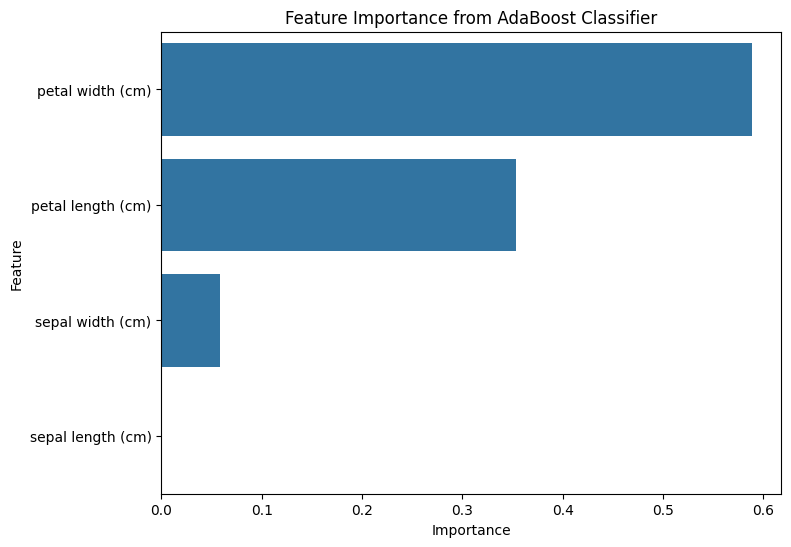

In [ ]:
#Import neccessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

#Devide x and y
data = load_iris()
x = data.data
y = data.target

## Initialize a weak learner (DecisionTreeClassifier) for AdaBoost
base_estimator = DecisionTreeClassifier(max_depth=1)

# Train the AdaBoostClassifier
model = AdaBoostClassifier(base_estimator, n_estimators=50)
model.fit(x, y)

# Get feature importance
importances = model.feature_importances_
feature_names = data.feature_names

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance from AdaBoost Classifier")
plt.show()

Ques-22 Train a Gradient Boosting Regressor and plot learning curves?

r2 score is : 0.8585142095674574


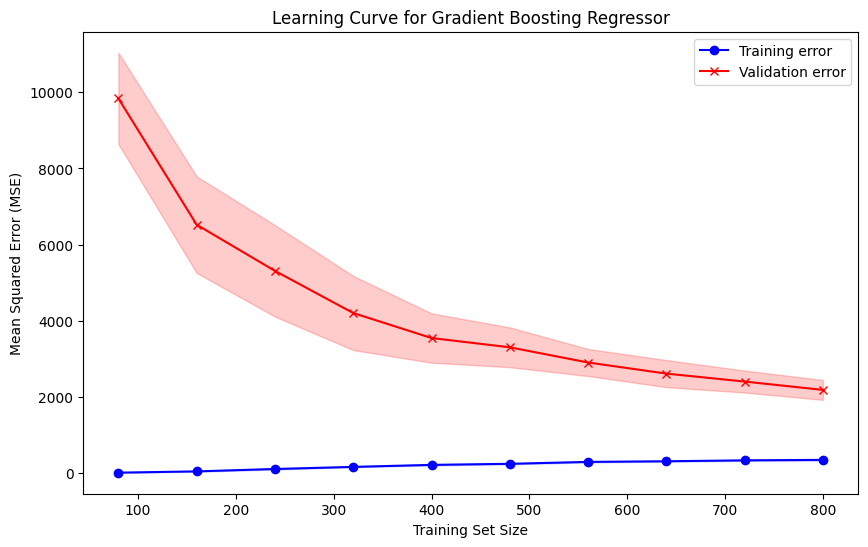

In [7]:
#Import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split , learning_curve
from sklearn.ensemble import GradientBoostingRegressor

#Load the dataset
X, y = make_regression(n_samples=1000, n_features=20, noise =0.2 , random_state=1)

#train test split
xtrain , xtest , ytrain , ytest = train_test_split(X ,y , test_size= 0.3 , random_state=1)

#Model training and prediction
GB = GradientBoostingRegressor()
GB.fit(xtrain , ytrain )
ypred = GB.predict(xtest)

#model evaluation
from sklearn.metrics import r2_score
rscore = r2_score(ypred , ytest)
print(f"r2 score is : {rscore}")

# Compute learning curve
train_sizes, train_scores, test_scores = learning_curve(
    GB, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of training and test scores
train_errors_mean = -train_scores.mean(axis=1)
test_errors_mean = -test_scores.mean(axis=1)

train_errors_std = train_scores.std(axis=1)
test_errors_std = test_scores.std(axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_errors_mean, label="Training error", color="blue", marker="o")
plt.plot(train_sizes, test_errors_mean, label="Validation error", color="red", marker="x")

# Fill between the standard deviation bounds for better visualization
plt.fill_between(train_sizes, train_errors_mean - train_errors_std, train_errors_mean + train_errors_std,
                 alpha=0.2, color="blue")
plt.fill_between(train_sizes, test_errors_mean - test_errors_std, test_errors_mean + test_errors_std,
                 alpha=0.2, color="red")

# Adding labels and title
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Learning Curve for Gradient Boosting Regressor")

# Show legend
plt.legend()

# Display the plot
plt.show()

Ques-23 Train an XGBoost Classifier and visualize feature importance ?

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:09:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model accuracy: 89.67%


<Figure size 1000x600 with 0 Axes>

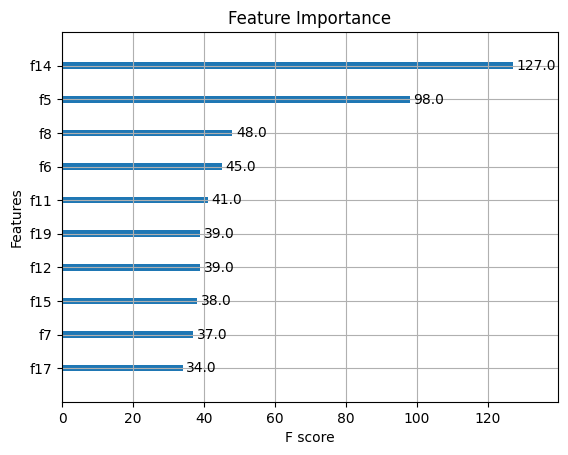

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import plot_importance

# Generate a synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Train-test split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the XGBoost Classifier
xgb_clf = xgb.XGBClassifier(eval_metric='logloss', use_label_encoder=False)
xgb_clf.fit(xtrain, ytrain)

# Model evaluation (optional)
from sklearn.metrics import accuracy_score
y_pred = xgb_clf.predict(xtest)
accuracy = accuracy_score(ytest, y_pred)
print(f"Model accuracy: {accuracy * 100:.2f}%")

# Visualize the feature importance
plt.figure(figsize=(10, 6))
plot_importance(xgb_clf, importance_type='weight', max_num_features=10)
plt.title("Feature Importance")
plt.show()


Ques-24 Train a CatBoost Classifier and plot the confusion matrix?

In [10]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.4 MB/s eta 0:00:00


Model accuracy: 87.33%


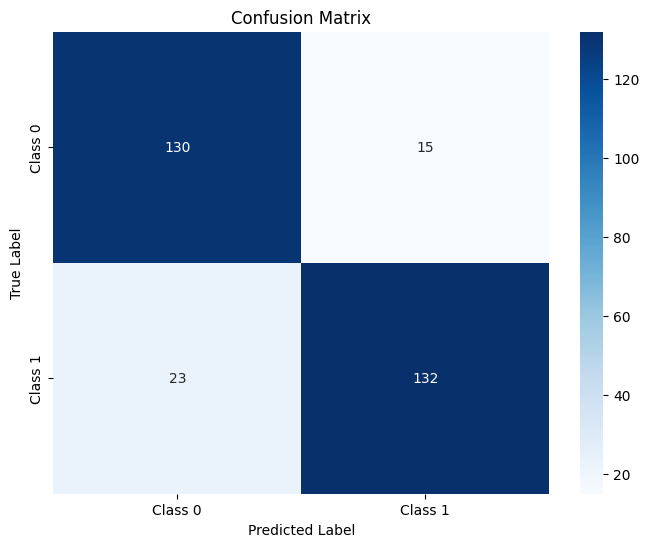

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Generate a synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Train-test split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the CatBoost Classifier
catboost_clf = CatBoostClassifier(iterations=500, learning_rate=0.05, depth=6, verbose=0)
catboost_clf.fit(xtrain, ytrain)

# Model evaluation (optional)
y_pred = catboost_clf.predict(xtest)
accuracy = accuracy_score(ytest, y_pred)
print(f"Model accuracy: {accuracy * 100:.2f}%")

# Compute confusion matrix
cm = confusion_matrix(ytest, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Ques-25 Train an AdaBoost Classifier with different numbers of estimators and compare accuracy ?

Accuracy with 50 estimators: 84.67%
Accuracy with 100 estimators: 85.67%
Accuracy with 200 estimators: 84.00%


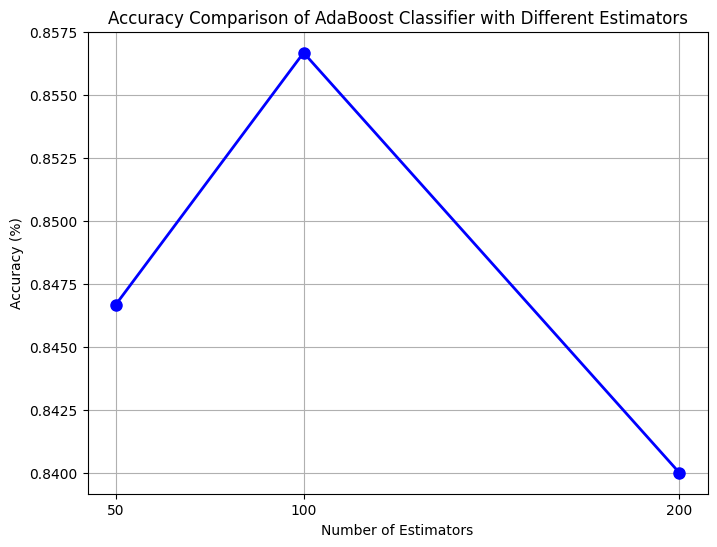

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Generate a synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Train-test split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

# List to store accuracy for different numbers of estimators
estimators = [50, 100, 200]
accuracies = []

# Train AdaBoost with different numbers of estimators
for n_estimators in estimators:
    # Initialize the AdaBoost Classifier
    ada_clf = AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=1),  # Using a weak classifier (Decision Tree with depth 1)
        n_estimators=n_estimators,
        random_state=42
    )

    # Train the model
    ada_clf.fit(xtrain, ytrain)

    # Predict and evaluate the model
    y_pred = ada_clf.predict(xtest)
    accuracy = accuracy_score(ytest, y_pred)
    accuracies.append(accuracy)
    print(f"Accuracy with {n_estimators} estimators: {accuracy * 100:.2f}%")

# Plot the comparison of accuracies
plt.figure(figsize=(8, 6))
plt.plot(estimators, accuracies, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.title("Accuracy Comparison of AdaBoost Classifier with Different Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy (%)")
plt.xticks(estimators)
plt.grid(True)
plt.show()


Ques-26 Train a Gradient Boosting Classifier and visualize the ROC curve?

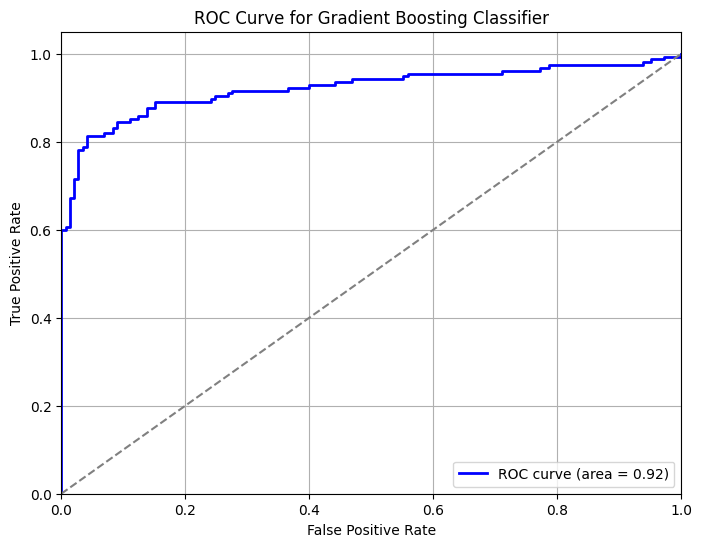

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc

# Generate a synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Train-test split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_clf.fit(xtrain, ytrain)

# Get predicted probabilities for the positive class (class 1)
y_pred_prob = gb_clf.predict_proba(xtest)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Ques-27 Train an XGBoost Regressor and tune the learning rate using GridSearchCV ?

Best parameters found by GridSearchCV: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Mean Squared Error of the best model: 2342.56


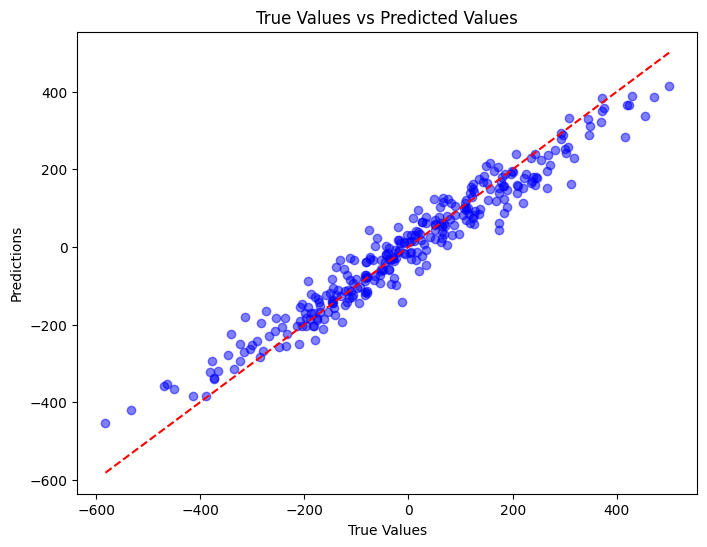

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Generate a synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.2, random_state=42)

# Train-test split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the XGBoost Regressor
xgb_reg = XGBRegressor(objective='reg:squarederror', random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],  # Tuning the learning rate
    'n_estimators': [100, 200, 300],               # Tuning the number of estimators
    'max_depth': [3, 5, 7]                          # Tuning the max depth
}

# Setup GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform the grid search
grid_search.fit(xtrain, ytrain)

# Print the best parameters found by GridSearchCV
print("Best parameters found by GridSearchCV:", grid_search.best_params_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
ypred = best_model.predict(xtest)

# Calculate the Mean Squared Error (MSE) on the test set
mse = mean_squared_error(ytest, ypred)
print(f"Mean Squared Error of the best model: {mse:.2f}")

# Plotting the predictions vs true values
plt.figure(figsize=(8, 6))
plt.scatter(ytest, ypred, alpha=0.5, color='blue')
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predicted Values')
plt.show()


Ques-28 Train a CatBoost Classifier on an imbalanced dataset and compare performance with class weighting ?

Performance without class weighting:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       270
           1       1.00      0.60      0.75        30

    accuracy                           0.96       300
   macro avg       0.98      0.80      0.86       300
weighted avg       0.96      0.96      0.96       300


Performance with class weighting:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       270
           1       0.74      0.67      0.70        30

    accuracy                           0.94       300
   macro avg       0.85      0.82      0.84       300
weighted avg       0.94      0.94      0.94       300



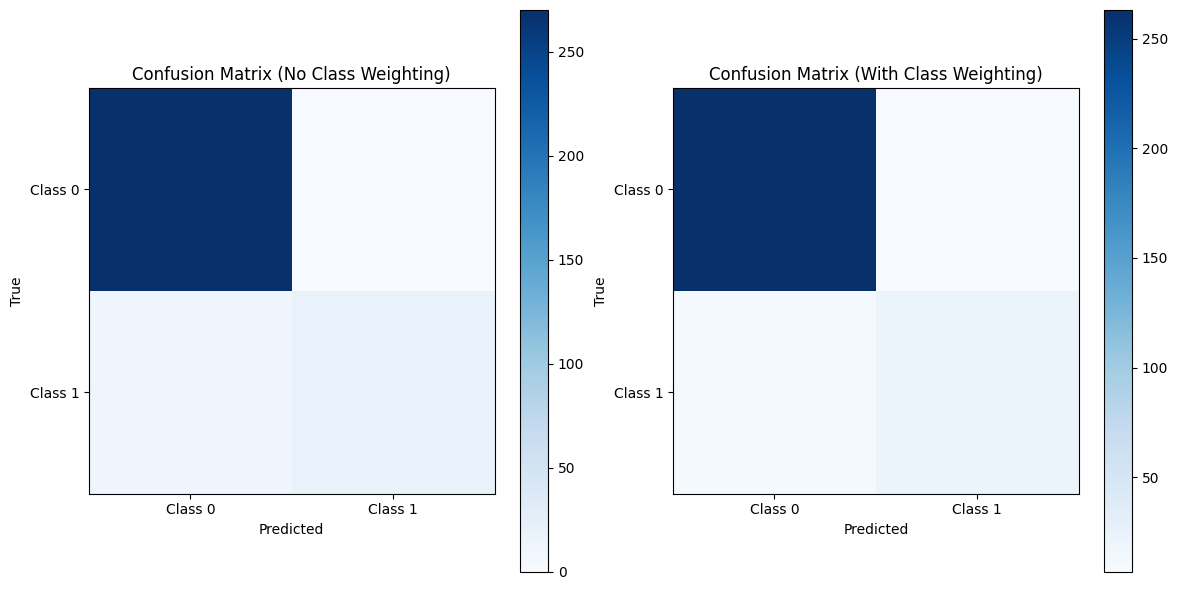

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Generate an imbalanced classification dataset
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_classes=2,
    weights=[0.9, 0.1],  # Imbalanced class distribution
    random_state=42
)

# Train-test split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the CatBoost Classifier without class weighting
catboost_clf = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.05, verbose=0)
catboost_clf.fit(xtrain, ytrain)

# Predictions without class weighting
y_pred_no_weight = catboost_clf.predict(xtest)

# Evaluate performance (without class weighting)
print("Performance without class weighting:")
print(classification_report(ytest, y_pred_no_weight))

# Initialize and train the CatBoost Classifier with class weighting
catboost_clf_weighted = CatBoostClassifier(
    iterations=500,
    depth=6,
    learning_rate=0.05,
    class_weights=[1, 10],  # Assign a higher weight to the minority class
    verbose=0
)
catboost_clf_weighted.fit(xtrain, ytrain)

# Predictions with class weighting
y_pred_weighted = catboost_clf_weighted.predict(xtest)

# Evaluate performance (with class weighting)
print("\nPerformance with class weighting:")
print(classification_report(ytest, y_pred_weighted))

# Confusion matrix for comparison
cm_no_weight = confusion_matrix(ytest, y_pred_no_weight)
cm_weighted = confusion_matrix(ytest, y_pred_weighted)

# Plot confusion matrix without class weighting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cm_no_weight, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix (No Class Weighting)")
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.yticks([0, 1], ['Class 0', 'Class 1'])
plt.tight_layout()

# Plot confusion matrix with class weighting
plt.subplot(1, 2, 2)
plt.imshow(cm_weighted, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix (With Class Weighting)")
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.yticks([0, 1], ['Class 0', 'Class 1'])
plt.tight_layout()

plt.show()


Ques-29 Train an AdaBoost Classifier and analyze the effect of different learning rates ?

Learning Rate: 0.01, Accuracy: 0.8400, F1-Score: 0.8399
Learning Rate: 0.05, Accuracy: 0.8400, F1-Score: 0.8399
Learning Rate: 0.1, Accuracy: 0.8400, F1-Score: 0.8399
Learning Rate: 0.5, Accuracy: 0.8400, F1-Score: 0.8399
Learning Rate: 1.0, Accuracy: 0.8467, F1-Score: 0.8467


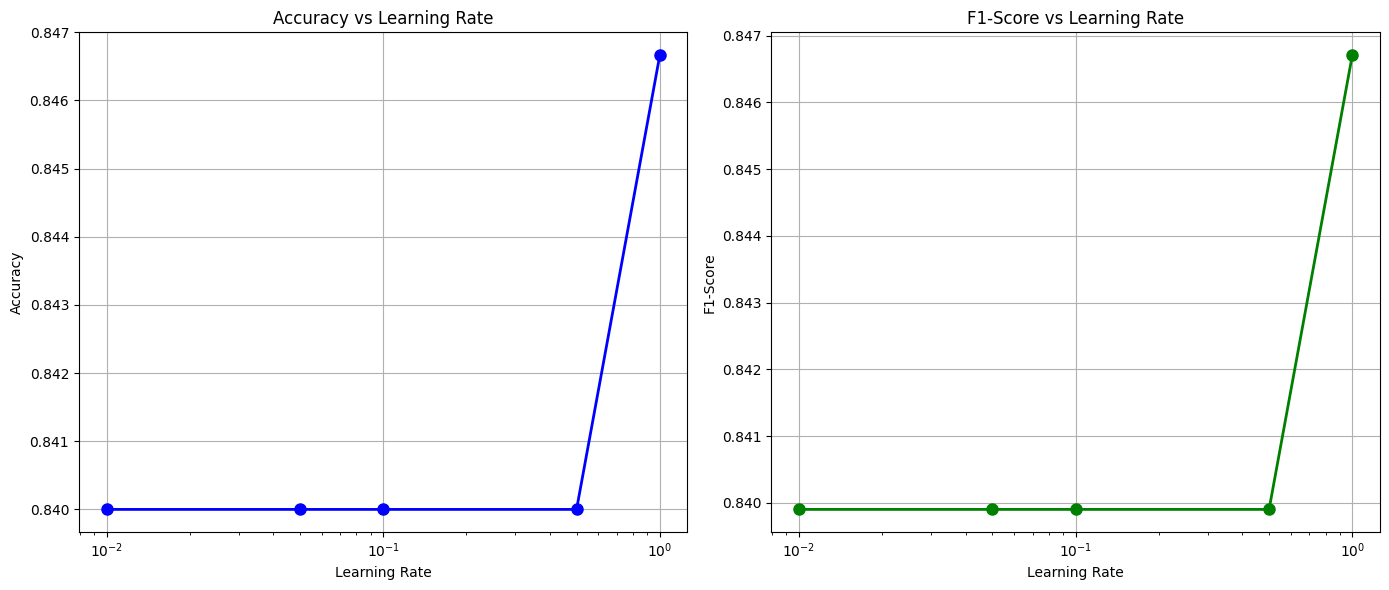

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Generate a synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Train-test split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

# List to store accuracy and F1 scores for different learning rates
learning_rates = [0.01, 0.05, 0.1, 0.5, 1.0]
accuracies = []
f1_scores = []

# Iterate over different learning rates
for lr in learning_rates:
    # Initialize AdaBoost Classifier with a base estimator (DecisionTree with max_depth=1)
    ada_clf = AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=1),
        n_estimators=50,    # Fixed number of estimators
        learning_rate=lr,   # Varying learning rate
        random_state=42
    )

    # Train the model
    ada_clf.fit(xtrain, ytrain)

    # Predict and evaluate the model
    y_pred = ada_clf.predict(xtest)
    accuracy = accuracy_score(ytest, y_pred)
    f1 = classification_report(ytest, y_pred, output_dict=True)['weighted avg']['f1-score']

    accuracies.append(accuracy)
    f1_scores.append(f1)
    print(f"Learning Rate: {lr}, Accuracy: {accuracy:.4f}, F1-Score: {f1:.4f}")

# Plot the performance comparison (Accuracy and F1-Score)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot Accuracy vs Learning Rate
ax1.plot(learning_rates, accuracies, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
ax1.set_title("Accuracy vs Learning Rate")
ax1.set_xlabel('Learning Rate')
ax1.set_ylabel('Accuracy')
ax1.set_xscale('log')  # Use logarithmic scale for better visualization of differences
ax1.grid(True)

# Plot F1-Score vs Learning Rate
ax2.plot(learning_rates, f1_scores, marker='o', color='g', linestyle='-', linewidth=2, markersize=8)
ax2.set_title("F1-Score vs Learning Rate")
ax2.set_xlabel('Learning Rate')
ax2.set_ylabel('F1-Score')
ax2.set_xscale('log')  # Use logarithmic scale for better visualization of differences
ax2.grid(True)

plt.tight_layout()
plt.show()


Ques-30 Train an XGBoost Classifier for multi-class classification and evaluate using log-loss ?

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:22:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Log-loss: 0.5369

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.80      0.79        99
           1       0.86      0.78      0.82       114
           2       0.74      0.83      0.78        87

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.80      0.80      0.80       300



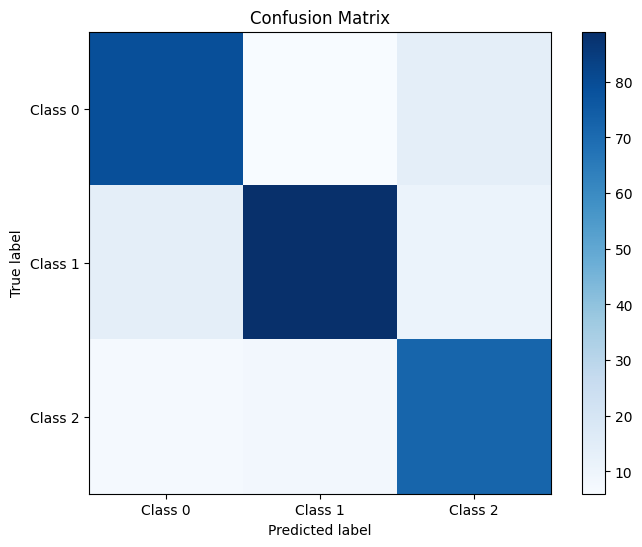

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import log_loss, classification_report

# Generate a synthetic multi-class classification dataset
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_classes=3,        # Multi-class classification (3 classes)
    n_informative=15,
    n_redundant=5,
    random_state=42
)

# Train-test split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert to DMatrix format (XGBoost specific)
dtrain = xgb.DMatrix(xtrain, label=ytrain)
dtest = xgb.DMatrix(xtest, label=ytest)

# Specify parameters for multi-class classification
params = {
    'objective': 'multi:softprob',  # Softmax for multi-class classification (predict probabilities)
    'num_class': 3,                # Number of classes
    'eval_metric': 'mlogloss',     # Multi-class log-loss metric
    'max_depth': 6,                # Max depth of trees
    'learning_rate': 0.1,          # Learning rate
    'n_estimators': 100            # Number of estimators (boosting rounds)
}

# Train the XGBoost model
num_round = 100  # Number of boosting rounds
bst = xgb.train(params, dtrain, num_round)

# Predict probabilities on the test set
ypred_prob = bst.predict(dtest)

# Calculate log-loss (logarithmic loss) for multi-class classification
loss = log_loss(ytest, ypred_prob)
print(f'Log-loss: {loss:.4f}')

# For detailed classification report, we take the predicted class with the highest probability
y_pred = np.argmax(ypred_prob, axis=1)

# Classification Report (Accuracy, Precision, Recall, F1-score)
print("\nClassification Report:")
print(classification_report(ytest, y_pred))

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks(np.arange(3), ['Class 0', 'Class 1', 'Class 2'])
plt.yticks(np.arange(3), ['Class 0', 'Class 1', 'Class 2'])
plt.show()
